# Chapter 4: Testing and regularization with Turi Create

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import utils

## Defining our dataset

Plotting the polynomial $-x^2+2$

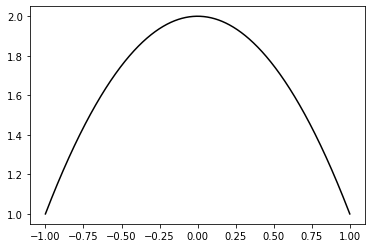

In [2]:
# Our original polynomial is -x^2+2
coefs = [2,0,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-1, 1, 1000)
    #plt.ylim(0,3)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

Generating a dataset of 40 points, close to this polynomial

In [3]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-1,1)
    y = polynomial(coefs, x) + random.gauss(0,0.1)
    X.append(x)
    Y.append(y)

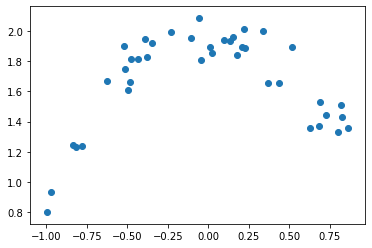

In [4]:
plt.scatter(X, Y)

## Training a polynomial regression model

Let's plot a polynomial of degree 20 to our dataset. Notice how much it overfits!

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def train_polynomial_regression(X, Y, degree, regularization=None, alpha=1.0):
    """
    Trains a polynomial regression model with optional L1 or L2 regularization.

    Args:
      X: Input features (list or numpy array).
      Y: Input labels (list or numpy array).
      degree: The degree of the polynomial.
      regularization: Type of regularization ('L1', 'L2', or None). Defaults to None.
      alpha: Regularization strength (for L1 and L2). Defaults to 1.0.

    Returns:
      A trained scikit-learn model object (LinearRegression, Ridge, or Lasso).
    """
    X = np.array(X).reshape(-1, 1)
    Y = np.array(Y)

    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)

    if regularization == 'L1':
        model = Lasso(alpha=alpha)
    elif regularization == 'L2':
        model = Ridge(alpha=alpha)
    else:
        model = LinearRegression()

    model.fit(X_poly, Y)

    return model

In [6]:
degree_used = 20
model = train_polynomial_regression(X, Y, degree_used)

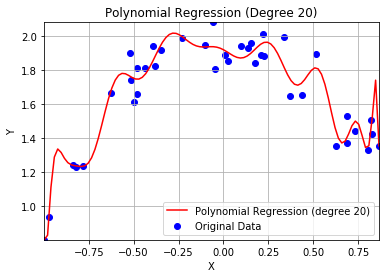

In [7]:
model = train_polynomial_regression(X, Y, degree_used)
utils.plot_polynomial_regression(model, X, Y, degree_used)

## Splitting data into training and testing

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

print("Shape of X_train:", np.shape(X_train))
print("Shape of X_test:", np.shape(X_test))
print("Shape of Y_train:", np.shape(Y_train))
print("Shape of Y_test:", np.shape(Y_test))

Shape of X_train: (32,)
Shape of X_test: (8,)
Shape of Y_train: (32,)
Shape of Y_test: (8,)


## Training a polynomial regression model with no regularization

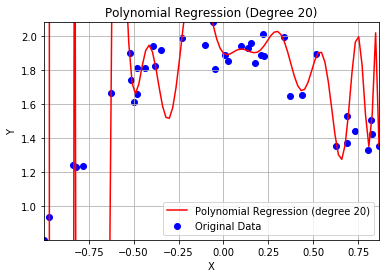

In [9]:
model_no_reg = train_polynomial_regression(X_train, Y_train, degree_used)
utils.plot_polynomial_regression(model_no_reg, X, Y, degree_used)

In [10]:
from sklearn.metrics import mean_squared_error

def evaluate_model(model, X_test, Y_test, degree):
    """
    Evaluates a trained polynomial regression model on test data and returns the RMSE.

    Args:
      model: The trained LinearRegression model object.
      X_test: Test set features (list or numpy array).
      Y_test: Test set labels (list or numpy array).
      degree: The degree of the polynomial used for training.

    Returns:
      The Root Mean Squared Error (RMSE) on the test set.
    """
    X_test = np.array(X_test).reshape(-1, 1)
    Y_test = np.array(Y_test)

    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_test_poly = poly.fit_transform(X_test)

    y_pred = model.predict(X_test_poly)

    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

    return rmse

In [11]:
square_loss_no_reg = evaluate_model(model_no_reg, X_test, Y_test, degree_used)
print(f"Square loss on the test set (degree {degree_used}): {square_loss_no_reg}")

Square loss on the test set (degree 20): 1862.044186833804


## Training a polynomial regression model with L1 regularization

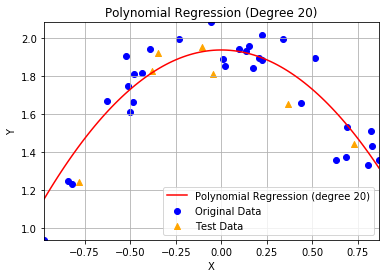

In [12]:
l1_penalty = 0.01
# Train with L1 (Lasso) regularization
model_L1_reg = train_polynomial_regression(X_train, Y_train, degree_used, 'L1', l1_penalty)
utils.plot_polynomial_regression(model_L1_reg, X_train, Y_train, degree_used, X_test, Y_test)

In [13]:
square_loss_L1_reg = evaluate_model(model_L1_reg, X_test, Y_test, degree_used)
print(f"Square loss on the test set (degree {degree_used}): {square_loss_L1_reg}")

Square loss on the test set (degree 20): 0.15277291798691608


## Training a polynomial regression model with L2 regularization

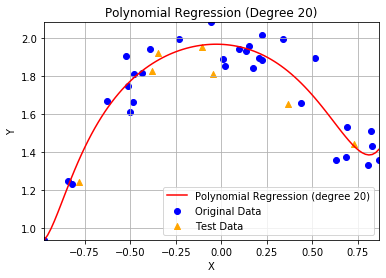

In [14]:
l2_penalty = 0.01
# Train with L2 (Ridge) regularization
model_L2_reg = train_polynomial_regression(X_train, Y_train, degree_used, 'L2', l2_penalty)
utils.plot_polynomial_regression(model_L2_reg, X_train, Y_train, degree_used, X_test, Y_test)

In [15]:
square_loss_L2_reg = evaluate_model(model_L2_reg, X_test, Y_test, degree_used)
print(f"Square loss on the test set (degree {degree_used}): {square_loss_L2_reg}")

Square loss on the test set (degree 20): 0.10370797950325954


### Exploring the coefficients of the models

In [16]:
print("Coefficients of the model with no regularization")
print(model_no_reg.intercept_)
print(model_no_reg.coef_)
print()
print("Coefficients of the model with L1 regularization")
print(model_L1_reg.intercept_)
print(model_L1_reg.coef_)
print()
print("Coefficients of the model with L2 regularization")
print(model_L2_reg.intercept_)
print(model_L2_reg.coef_)

Coefficients of the model with no regularization
1.901266405614063
[-9.79665248e-01  2.98406345e+01 -1.41282426e+02 -1.02771684e+03
  6.61434167e+03  1.22323824e+04 -1.00709568e+05 -5.98509879e+04
  7.50288598e+05  4.45478152e+04 -3.10618315e+06  7.24276788e+05
  7.44550364e+06 -3.07968500e+06 -1.02068548e+07  5.42180671e+06
  7.39026518e+06 -4.50333021e+06 -2.18315459e+06  1.44276328e+06]

Coefficients of the model with L1 regularization
1.9373689727450651
[ 0.         -0.83079676  0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.        ]

Coefficients of the model with L2 regularization
1.9671361086809411
[-0.04542753 -0.82453981 -0.16978143 -0.43399264  0.13531673  0.07350288
  0.30766892  0.21134133  0.27102186  0.19063908  0.16047161  0.13049321
  0.05343988  0.07533308 -0.0248309   0.03657711 -0.07321622  0.0135393
 -0.09836497  0.00221089]
